##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE173468**

file previously downloaded:
GSE173468_RAW.tar

unzipped using 
``` bash
tar -xvf GSE173468_RAW.tar
```

This gives the following files: 
* GSM5268284_N3-6-6_barcodes.tsv.gz
* GSM5268284_N3-6-6_features.tsv.gz
* GSM5268284_N3-6-6_matrix.mtx.gz
* GSM5268285_N5-6-6_barcodes.tsv.gz
* GSM5268285_N5-6-6_features.tsv.gz
* GSM5268285_N5-6-6_matrix.mtx.gz
* GSM5268286_N6-6-6_barcodes.tsv.gz
* GSM5268286_N6-6-6_features.tsv.gz
* GSM5268286_N6-6-6_matrix.mtx.gz
* GSM5268287_T10-6-6_barcodes.tsv.gz
* GSM5268287_T10-6-6_features.tsv.gz
* GSM5268287_T10-6-6_matrix.mtx.gz
* GSM5268288_T13-6-6_barcodes.tsv.gz
* GSM5268288_T13-6-6_features.tsv.gz
* GSM5268288_T13-6-6_matrix.mtx.gz
* GSM5268289_T14-6-6_barcodes.tsv.gz
* GSM5268289_T14-6-6_features.tsv.gz
* GSM5268289_T14-6-6_matrix.mtx.gz
* GSM5268290_T1-6-6_barcodes.tsv.gz
* GSM5268290_T1-6-6_features.tsv.gz
* GSM5268290_T1-6-6_matrix.mtx.gz
* GSM5268291_T19-6-6_barcodes.tsv.gz
* GSM5268291_T19-6-6_features.tsv.gz
* GSM5268291_T19-6-6_matrix.mtx.gz
* GSM5268292_T22_6-6_barcodes.tsv.gz
* GSM5268292_T22_6-6_features.tsv.gz
* GSM5268292_T22_6-6_matrix.mtx.gz
* GSM5268293_T25_6-6_barcodes.tsv.gz
* GSM5268293_T25_6-6_features.tsv.gz
* GSM5268293_T25_6-6_matrix.mtx.gz
* GSM5268294_T26_6-6_barcodes.tsv.gz
* GSM5268294_T26_6-6_features.tsv.gz
* GSM5268294_T26_6-6_matrix.mtx.gz
* GSM5268295_T27_6-6_barcodes.tsv.gz
* GSM5268295_T27_6-6_features.tsv.gz
* GSM5268295_T27_6-6_matrix.mtx.gz
* GSM5268296_T29Met_6-6_barcodes.tsv.gz
* GSM5268296_T29Met_6-6_features.tsv.gz
* GSM5268296_T29Met_6-6_matrix.mtx.gz
* GSM5268297_T29Primer_6-6_barcodes.tsv.gz
* GSM5268297_T29Primer_6-6_features.tsv.gz
* GSM5268297_T29Primer_6-6_matrix.mtx.gz
* GSM5268298_T3-6-6_barcodes.tsv.gz
* GSM5268298_T3-6-6_features.tsv.gz
* GSM5268298_T3-6-6_matrix.mtx.gz
* GSM5268299_T5-6-6_barcodes.tsv.gz
* GSM5268299_T5-6-6_features.tsv.gz
* GSM5268299_T5-6-6_matrix.mtx.gz
* GSM5268300_T6-6-6_barcodes.tsv.gz
* GSM5268300_T6-6-6_features.tsv.gz
* GSM5268300_T6-6-6_matrix.mtx.gz
* GSM5268301_T8-6-6_barcodes.tsv.gz
* GSM5268301_T8-6-6_features.tsv.gz
* GSM5268301_T8-6-6_matrix.mtx.gz


Files were then organised into seperate folders for each patient and named with correct file names.

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE173468')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE173468"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#load all datasets
N3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/N3")
N5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/N5")
N6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/N6")
T1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T1")
T3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T3")
T5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T5")
T6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T6")
T8.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T8")
T10.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T10")
T13.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T13")
T14.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T14")
T19.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T19")
T22.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T22")
T25.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T25")
T26.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T26")
T27.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T27")
T29Met.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T29Met")
T29Prim.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE173468/T29Primer")


In [4]:
#Add dataset info to colnames
colnames(N3.data) <- paste0("GSE173468_N3_", colnames(N3.data))
colnames(N5.data) <- paste0("GSE173468_N5_", colnames(N5.data))
colnames(N6.data) <- paste0("GSE173468_N6_", colnames(N6.data))
colnames(T1.data) <- paste0("GSE173468_T1_", colnames(T1.data))
colnames(T3.data) <- paste0("GSE173468_T3_", colnames(T3.data))
colnames(T5.data) <- paste0("GSE173468_T5_", colnames(T5.data))
colnames(T6.data) <- paste0("GSE173468_T6_", colnames(T6.data))
colnames(T8.data) <- paste0("GSE173468_T8_", colnames(T8.data))
colnames(T10.data) <- paste0("GSE173468_T10_", colnames(T10.data))
colnames(T13.data) <- paste0("GSE173468_T13_", colnames(T13.data))
colnames(T14.data) <- paste0("GSE173468_T14_", colnames(T14.data))
colnames(T19.data) <- paste0("GSE173468_T19_", colnames(T19.data))
colnames(T22.data) <- paste0("GSE173468_T22_", colnames(T22.data))
colnames(T25.data) <- paste0("GSE173468_T25_", colnames(T25.data))
colnames(T26.data) <- paste0("GSE173468_T26_", colnames(T26.data))
colnames(T27.data) <- paste0("GSE173468_T27_", colnames(T27.data))
colnames(T29Met.data) <- paste0("GSE173468_T29Met_", colnames(T29Met.data))
colnames(T29Prim.data) <- paste0("GSE173468_T29Primary_", colnames(T29Prim.data))

In [5]:
head(colnames(T29Met.data))

[1] "GSE173468_T29Met_AAACCTGAGACCTAGG-1" "GSE173468_T29Met_AAACCTGAGACTGTAA-1"
[3] "GSE173468_T29Met_AAACCTGAGCCAGTAG-1" "GSE173468_T29Met_AAACCTGAGCCTCGTG-1"
[5] "GSE173468_T29Met_AAACCTGAGTATCTCG-1" "GSE173468_T29Met_AAACCTGCACGCCAGT-1"

In [6]:
#create seperate seurat object for each sample
N3 <- CreateSeuratObject(counts = N3.data, project = "GSE173468", min.features = 200)

#add metadata to sample
N3@meta.data$sample_type <- "Healthy"
N3@meta.data$cancer_type <- "Healthy"
N3@meta.data$patient_id <- "N3"
N3@meta.data$sample_id <- "GSE173468_Healthy_N3"

In [7]:
#Repeat for remaining samples

#create seperate seurat object for each sample
N5 <- CreateSeuratObject(counts = N5.data, project = "GSE173468", min.features = 200)

#add metadata to sample
N5@meta.data$sample_type <- "Healthy"
N5@meta.data$cancer_type <- "Healthy"
N5@meta.data$patient_id <- "N5"
N5@meta.data$sample_id <- "GSE173468_Healthy_N5"

#create seperate seurat object for each sample
N6 <- CreateSeuratObject(counts = N6.data, project = "GSE173468", min.features = 200)

#add metadata to sample
N6@meta.data$sample_type <- "Healthy"
N6@meta.data$cancer_type <- "Healthy"
N6@meta.data$patient_id <- "N6"
N6@meta.data$sample_id <- "GSE173468_Healthy_N6"

#create seperate seurat object for each sample
T1 <- CreateSeuratObject(counts = T1.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T1@meta.data$sample_type <- "tumour"
T1@meta.data$cancer_type <- "HNSCC"
T1@meta.data$patient_id <- "T1"
T1@meta.data$sample_id <- "GSE173468_HNSCC_T1"

#create seperate seurat object for each sample
T3 <- CreateSeuratObject(counts = T3.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T3@meta.data$sample_type <- "tumour"
T3@meta.data$cancer_type <- "HNSCC"
T3@meta.data$patient_id <- "T3"
T3@meta.data$sample_id <- "GSE173468_HNSCC_T3"

#create seperate seurat object for each sample
T5 <- CreateSeuratObject(counts = T5.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T5@meta.data$sample_type <- "tumour"
T5@meta.data$cancer_type <- "HNSCC"
T5@meta.data$patient_id <- "T5"
T5@meta.data$sample_id <- "GSE173468_HNSCC_T5"

#create seperate seurat object for each sample
T6 <- CreateSeuratObject(counts = T6.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T6@meta.data$sample_type <- "tumour"
T6@meta.data$cancer_type <- "HNSCC"
T6@meta.data$patient_id <- "T6"
T6@meta.data$sample_id <- "GSE173468_HNSCC_T6"

#create seperate seurat object for each sample
T8 <- CreateSeuratObject(counts = T8.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T8@meta.data$sample_type <- "tumour"
T8@meta.data$cancer_type <- "HNSCC"
T8@meta.data$patient_id <- "T8"
T8@meta.data$sample_id <- "GSE173468_HNSCC_T8"

#create seperate seurat object for each sample
T10 <- CreateSeuratObject(counts = T10.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T10@meta.data$sample_type <- "tumour"
T10@meta.data$cancer_type <- "HNSCC"
T10@meta.data$patient_id <- "T10"
T10@meta.data$sample_id <- "GSE173468_HNSCC_T10"

#create seperate seurat object for each sample
T13 <- CreateSeuratObject(counts = T13.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T13@meta.data$sample_type <- "tumour"
T13@meta.data$cancer_type <- "HNSCC"
T13@meta.data$patient_id <- "T13"
T13@meta.data$sample_id <- "GSE173468_HNSCC_T13"

#create seperate seurat object for each sample
T14 <- CreateSeuratObject(counts = T14.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T14@meta.data$sample_type <- "tumour"
T14@meta.data$cancer_type <- "HNSCC"
T14@meta.data$patient_id <- "T14"
T14@meta.data$sample_id <- "GSE173468_HNSCC_T14"

#create seperate seurat object for each sample
T19 <- CreateSeuratObject(counts = T19.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T19@meta.data$sample_type <- "tumour"
T19@meta.data$cancer_type <- "HNSCC"
T19@meta.data$patient_id <- "T19"
T19@meta.data$sample_id <- "GSE173468_HNSCC_T19"

#create seperate seurat object for each sample
T22 <- CreateSeuratObject(counts = T22.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T22@meta.data$sample_type <- "tumour"
T22@meta.data$cancer_type <- "HNSCC"
T22@meta.data$patient_id <- "T22"
T22@meta.data$sample_id <- "GSE173468_HNSCC_T22"

#create seperate seurat object for each sample
T25 <- CreateSeuratObject(counts = T25.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T25@meta.data$sample_type <- "tumour"
T25@meta.data$cancer_type <- "HNSCC"
T25@meta.data$patient_id <- "T25"
T25@meta.data$sample_id <- "GSE173468_HNSCC_T25"

#create seperate seurat object for each sample
T26 <- CreateSeuratObject(counts = T26.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T26@meta.data$sample_type <- "tumour"
T26@meta.data$cancer_type <- "HNSCC"
T26@meta.data$patient_id <- "T26"
T26@meta.data$sample_id <- "GSE173468_HNSCC_T26"

#create seperate seurat object for each sample
T27 <- CreateSeuratObject(counts = T27.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T27@meta.data$sample_type <- "tumour"
T27@meta.data$cancer_type <- "HNSCC"
T27@meta.data$patient_id <- "T27"
T27@meta.data$sample_id <- "GSE173468_HNSCC_T27"

#create seperate seurat object for each sample
T29Met <- CreateSeuratObject(counts = T29Met.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T29Met@meta.data$sample_type <- "tumour-mets"
T29Met@meta.data$cancer_type <- "HNSCC"
T29Met@meta.data$patient_id <- "T29Met"
T29Met@meta.data$sample_id <- "GSE173468_HNSCC_Mets_T29"

#create seperate seurat object for each sample
T29Prim <- CreateSeuratObject(counts = T29Prim.data, project = "GSE173468", min.features = 200)

#add metadata to sample
T29Prim@meta.data$sample_type <- "tumour"
T29Prim@meta.data$cancer_type <- "HNSCC"
T29Prim@meta.data$patient_id <- "T29Prim"
T29Prim@meta.data$sample_id <- "GSE173468_HNSCC_Prim_T29"

In [8]:
head(T29Prim@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE173468_T29Primary_AAACCTGAGTCATGCT-1 GSE173468  12530      2679        
GSE173468_T29Primary_AAACCTGGTCACCTAA-1 GSE173468  16162      4846        
GSE173468_T29Primary_AAACCTGGTCCAAGTT-1 GSE173468   3040      1426        
GSE173468_T29Primary_AAACCTGTCTGTCCGT-1 GSE173468  15500      3625        
GSE173468_T29Primary_AAACGGGAGAGGTTGC-1 GSE173468   1584       675        
GSE173468_T29Primary_AAACGGGCAAACTGTC-1 GSE173468   3110      1578        
                                        sample_type cancer_type patient_id
GSE173468_T29Primary_AAACCTGAGTCATGCT-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_AAACCTGGTCACCTAA-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_AAACCTGGTCCAAGTT-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_AAACCTGTCTGTCCGT-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_AAACGGGAGAGGTTGC-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_AAACGGGCAAACTGTC-1 tumour      HNSCC       T29Prim   
                                        sample_id               
GSE173468_T29Primary_AAACCTGAGTCATGCT-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_AAACCTGGTCACCTAA-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_AAACCTGGTCCAAGTT-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_AAACCTGTCTGTCCGT-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_AAACGGGAGAGGTTGC-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_AAACGGGCAAACTGTC-1 GSE173468_HNSCC_Prim_T29

In [9]:
#Merge seurat objects

HNSCC <- merge(N3, y = c(N5, N6, T1, T3, T5, T6, T8, T10, T13, T14, T19, T22, T25, T26, T27, T29Met, T29Prim), project = "GSE173468")

In [10]:
HNSCC
head(HNSCC@meta.data)
tail(HNSCC@meta.data)

An object of class Seurat 
36601 features across 85677 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 18 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18

orig.ident nCount_RNA nFeature_RNA sample_type
GSE173468_N3_AAACCTGAGAGCCTAG-1 GSE173468  2128        817         Healthy    
GSE173468_N3_AAACCTGCAAGAAGAG-1 GSE173468  2158        682         Healthy    
GSE173468_N3_AAACCTGGTCTCCATC-1 GSE173468  4827       1330         Healthy    
GSE173468_N3_AAACCTGTCTATGTGG-1 GSE173468  3380       1435         Healthy    
GSE173468_N3_AAACGGGAGGGTTTCT-1 GSE173468   849        478         Healthy    
GSE173468_N3_AAACGGGCAATACGCT-1 GSE173468  6320       2465         Healthy    
                                cancer_type patient_id sample_id           
GSE173468_N3_AAACCTGAGAGCCTAG-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACCTGCAAGAAGAG-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACCTGGTCTCCATC-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACCTGTCTATGTGG-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACGGGAGGGTTTCT-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACGGGCAATACGCT-1 Healthy     N3         GSE173468_Healthy_N3

orig.ident nCount_RNA nFeature_RNA
GSE173468_T29Primary_TTTGTCAAGCTGGAAC-1 GSE173468  23574      4659        
GSE173468_T29Primary_TTTGTCAAGGCATTGG-1 GSE173468  19691      1663        
GSE173468_T29Primary_TTTGTCAAGTGCGATG-1 GSE173468  13220      3572        
GSE173468_T29Primary_TTTGTCACACAGCGTC-1 GSE173468   1846       839        
GSE173468_T29Primary_TTTGTCAGTGCCTTGG-1 GSE173468   2152       974        
GSE173468_T29Primary_TTTGTCATCAAAGACA-1 GSE173468  25636      4305        
                                        sample_type cancer_type patient_id
GSE173468_T29Primary_TTTGTCAAGCTGGAAC-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_TTTGTCAAGGCATTGG-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_TTTGTCAAGTGCGATG-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_TTTGTCACACAGCGTC-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_TTTGTCAGTGCCTTGG-1 tumour      HNSCC       T29Prim   
GSE173468_T29Primary_TTTGTCATCAAAGACA-1 tumour      HNSCC       T29Prim   
                                        sample_id               
GSE173468_T29Primary_TTTGTCAAGCTGGAAC-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_TTTGTCAAGGCATTGG-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_TTTGTCAAGTGCGATG-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_TTTGTCACACAGCGTC-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_TTTGTCAGTGCCTTGG-1 GSE173468_HNSCC_Prim_T29
GSE173468_T29Primary_TTTGTCATCAAAGACA-1 GSE173468_HNSCC_Prim_T29

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


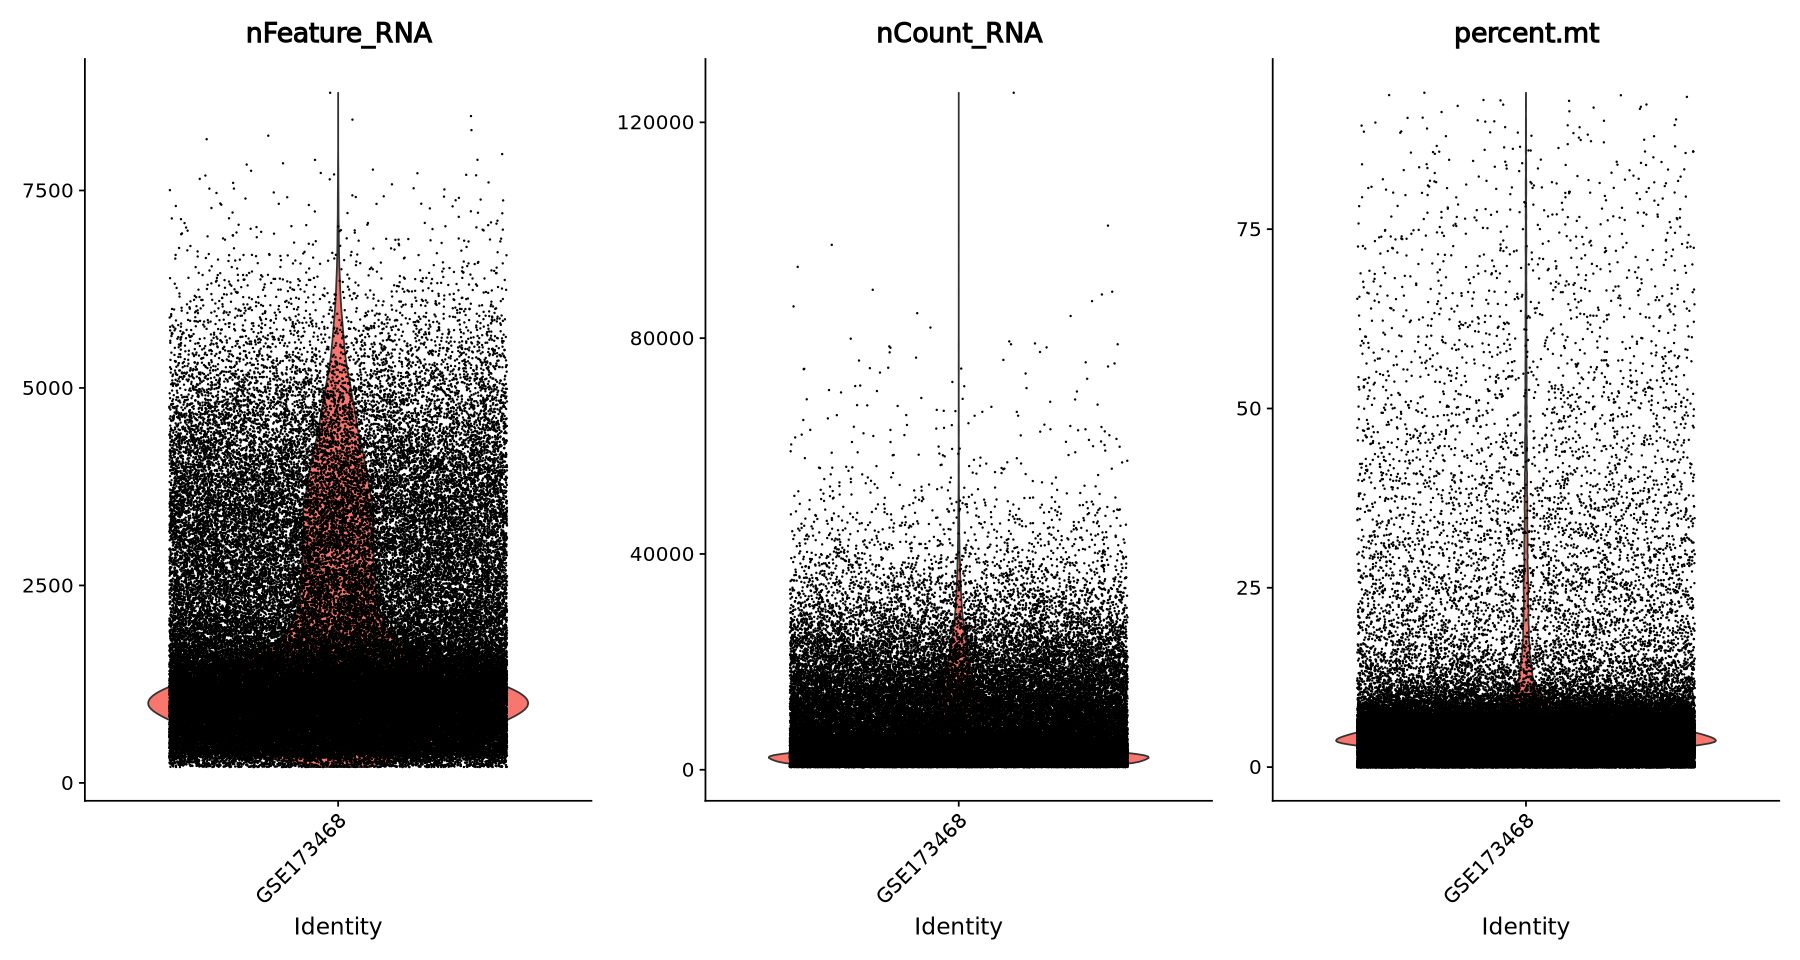

In [11]:
#QC Steps 
HNSCC[["percent.mt"]] <- PercentageFeatureSet(HNSCC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(HNSCC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [12]:
#Normalise the data
HNSCC <- NormalizeData(HNSCC)
#Find variable features
HNSCC <- FindVariableFeatures(HNSCC, selection.method = "vst", nfeatures = 2000)
#Scale the data
HNSCC <- ScaleData(HNSCC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
HNSCC <- RunPCA(HNSCC, features = VariableFeatures(object = HNSCC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14

Normalizing layer: counts.15

Normalizing layer: counts.16

Normalizing layer: counts.17

Normalizing layer: counts.18

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding 

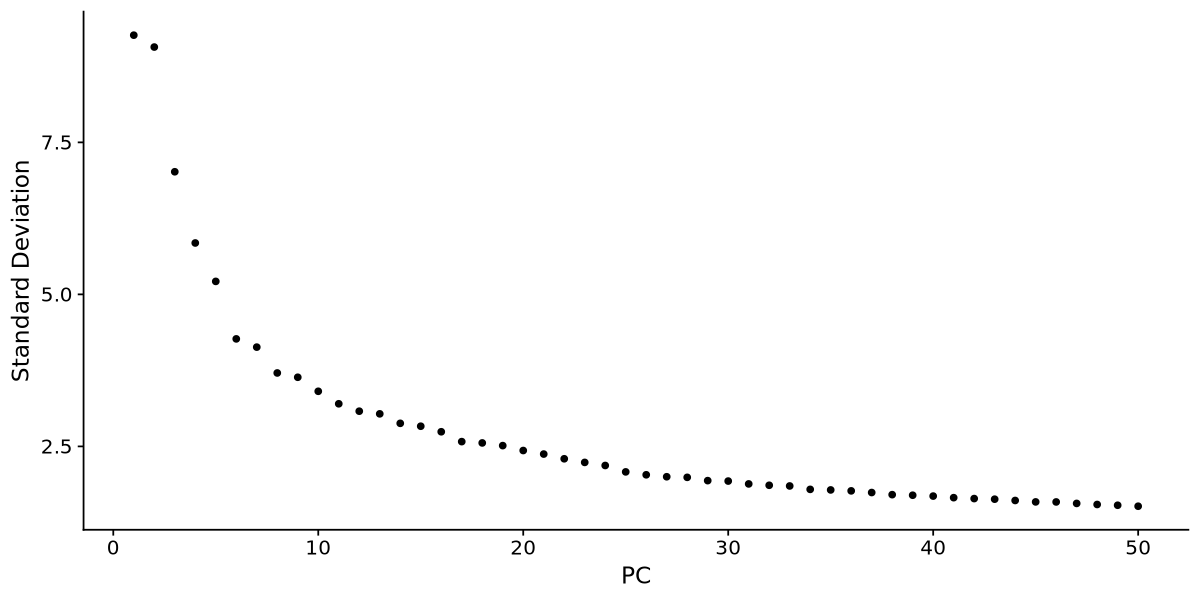

In [13]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(HNSCC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [14]:
#Find neighbours (make sure number matches no. features chosen above)
HNSCC <- FindNeighbors(HNSCC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [15]:
#Run UMAP
HNSCC <- RunUMAP(HNSCC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:52:13 UMAP embedding parameters a = 0.9922 b = 1.112

14:52:13 Read 85677 rows and found 40 numeric columns

14:52:13 Using Annoy for neighbor search, n_neighbors = 30

14:52:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%



[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:52:20 Writing NN index file to temp file /scratch/temp/9150857/Rtmp0VN2wy/file3ad21316cb6f9

14:52:20 Searching Annoy index using 1 thread, search_k = 3000

14:52:46 Annoy recall = 100%

14:52:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:52:48 Initializing from normalized Laplacian + noise (using RSpectra)

14:52:56 Commencing optimization for 200 epochs, with 3944294 positive edges

14:53:27 Optimization finished



In [16]:
#Cluster, resolution here set to 0.2
HNSCC <- FindClusters(HNSCC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 85677
Number of edges: 3165961

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9701
Number of communities: 23
Elapsed time: 21 seconds


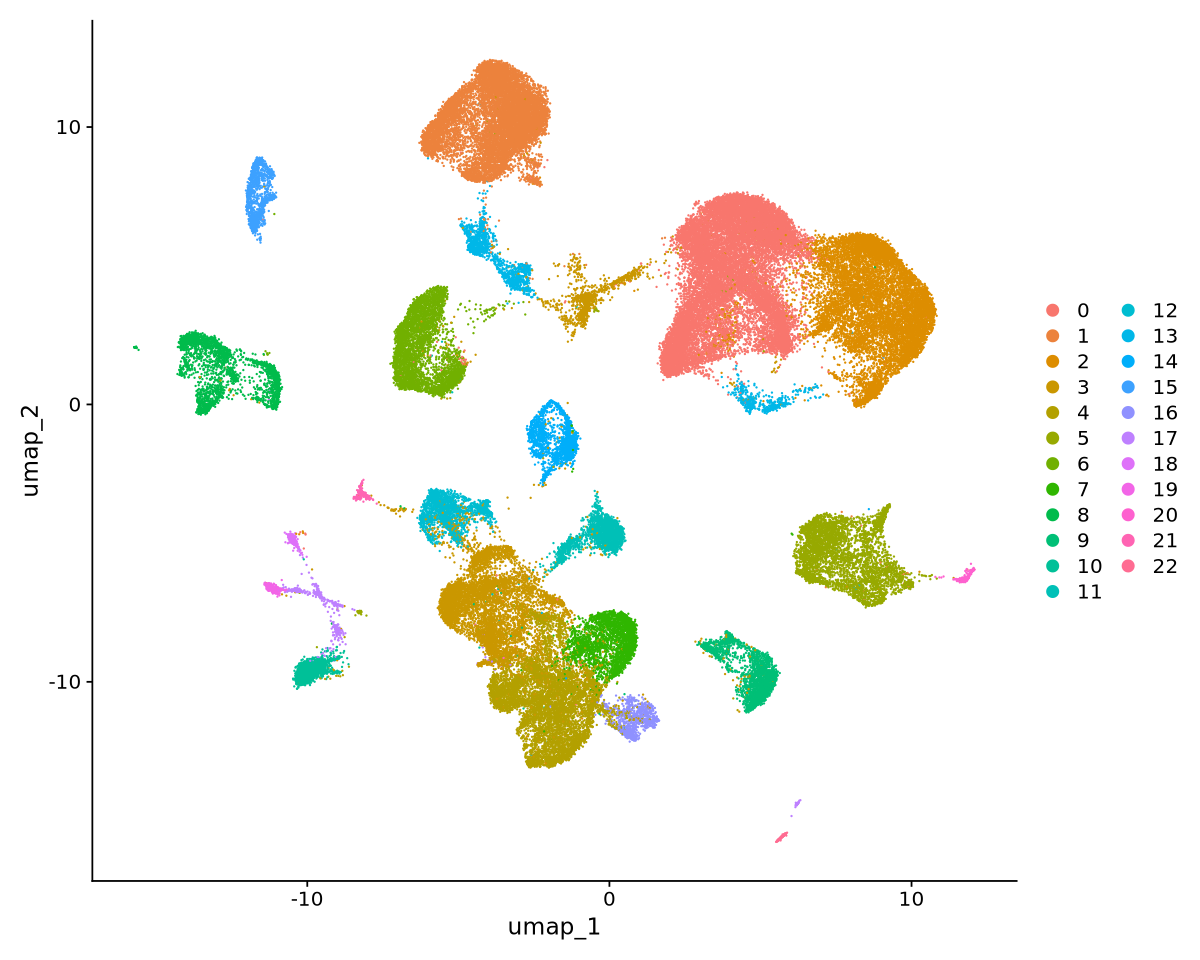

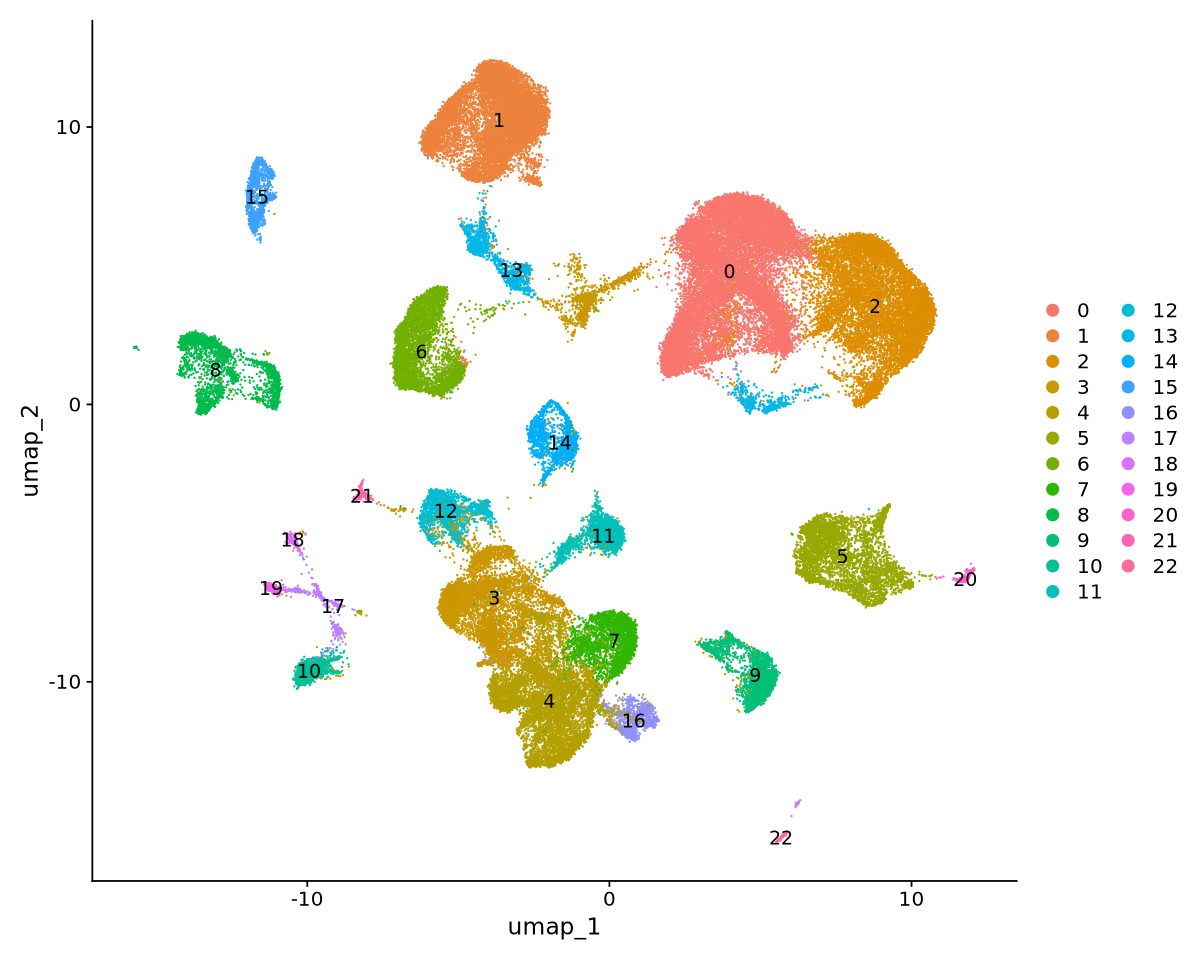

In [17]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(HNSCC, reduction = "umap")
DimPlot(HNSCC, reduction = "umap", label=TRUE)

In [18]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(HNSCC, file = "/scratch/user/s4436039/scdata/GSE173468/GSE173468.RDS")

### Next part of code is about determining which cluster is the myeloid cells

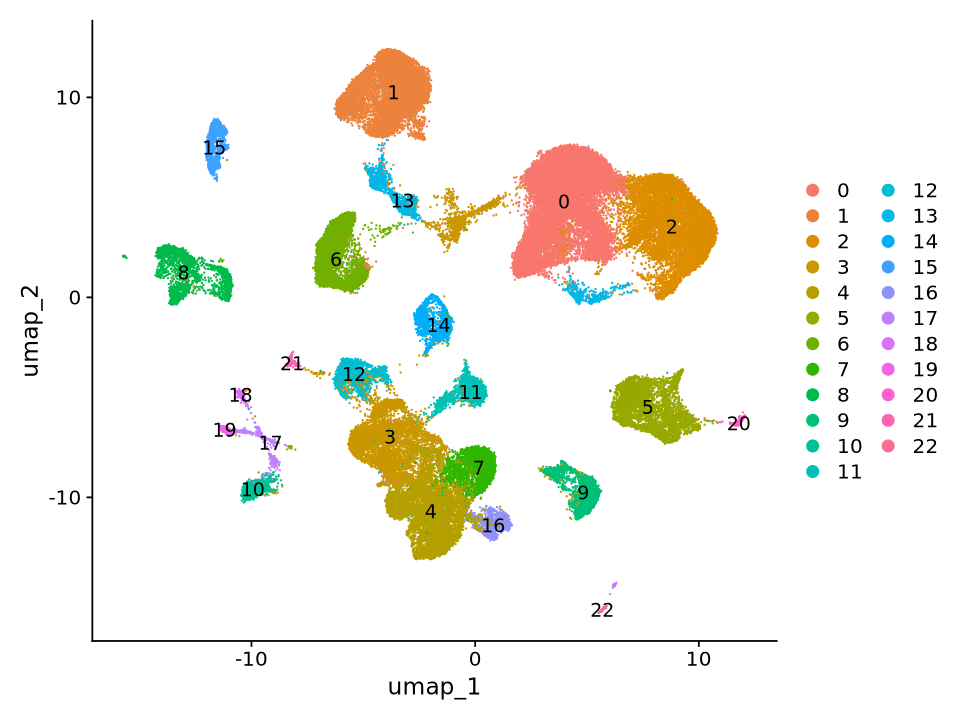

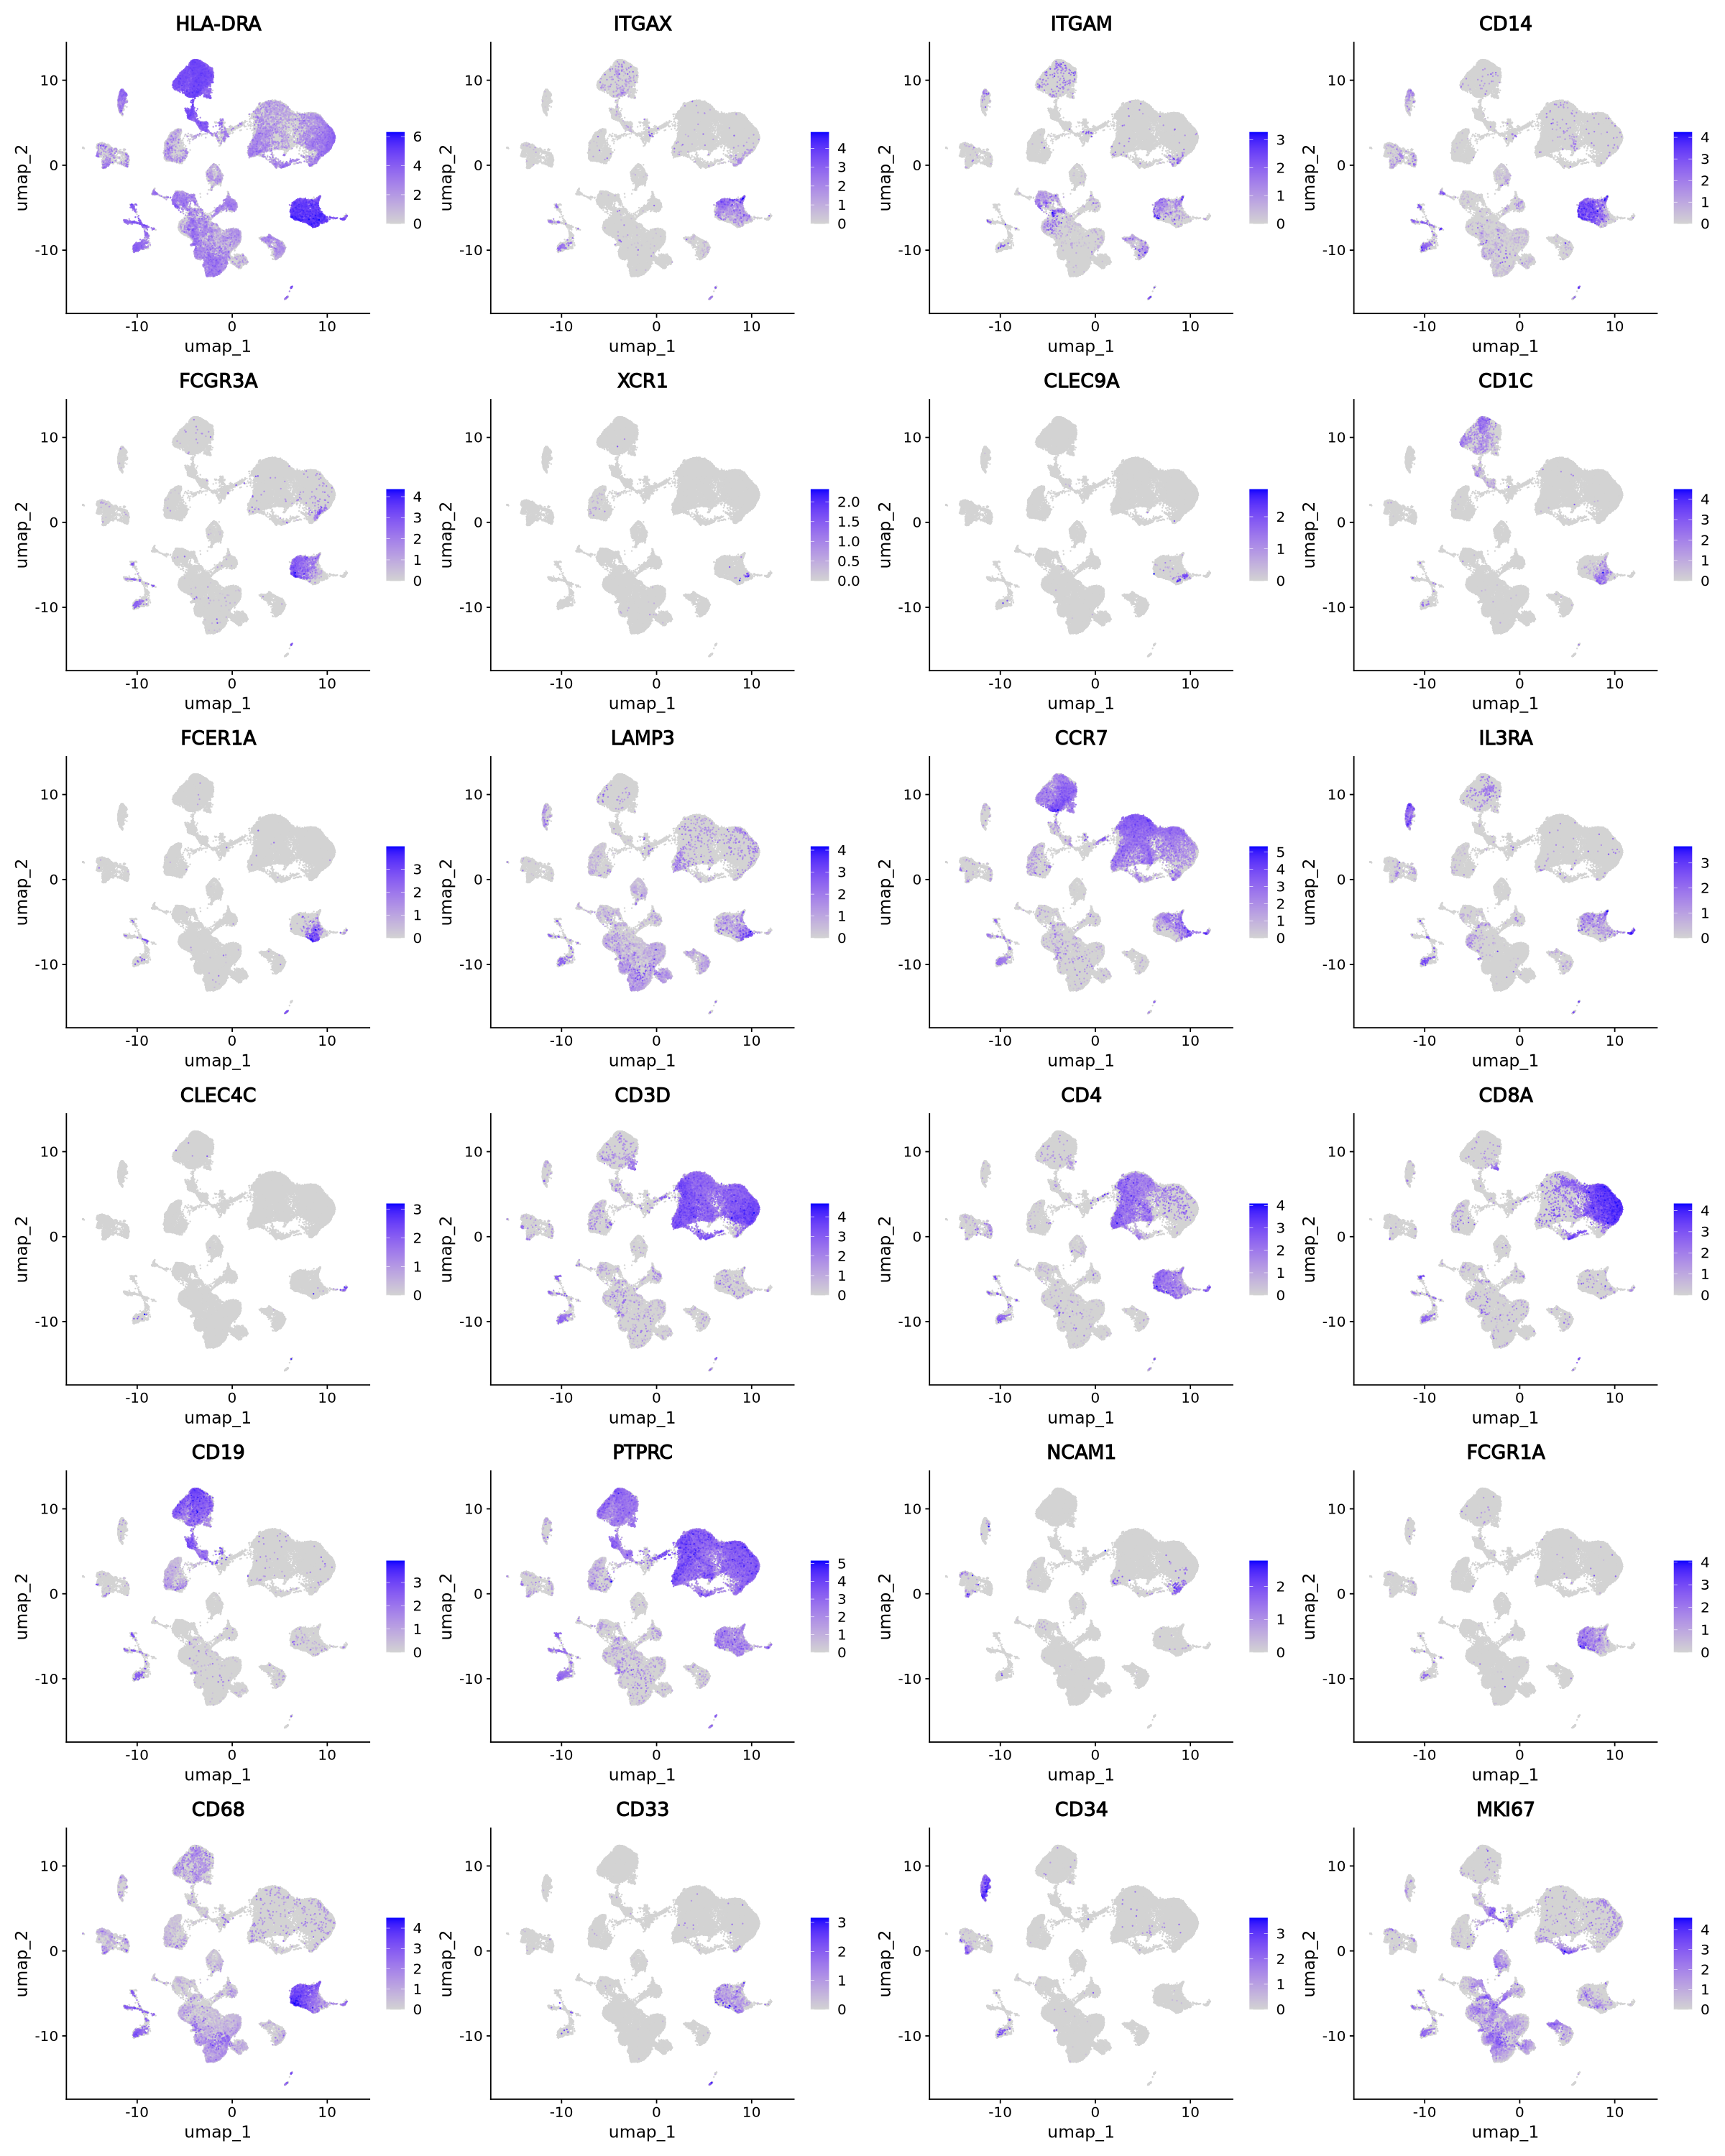

In [19]:
#Plot genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(HNSCC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)
     

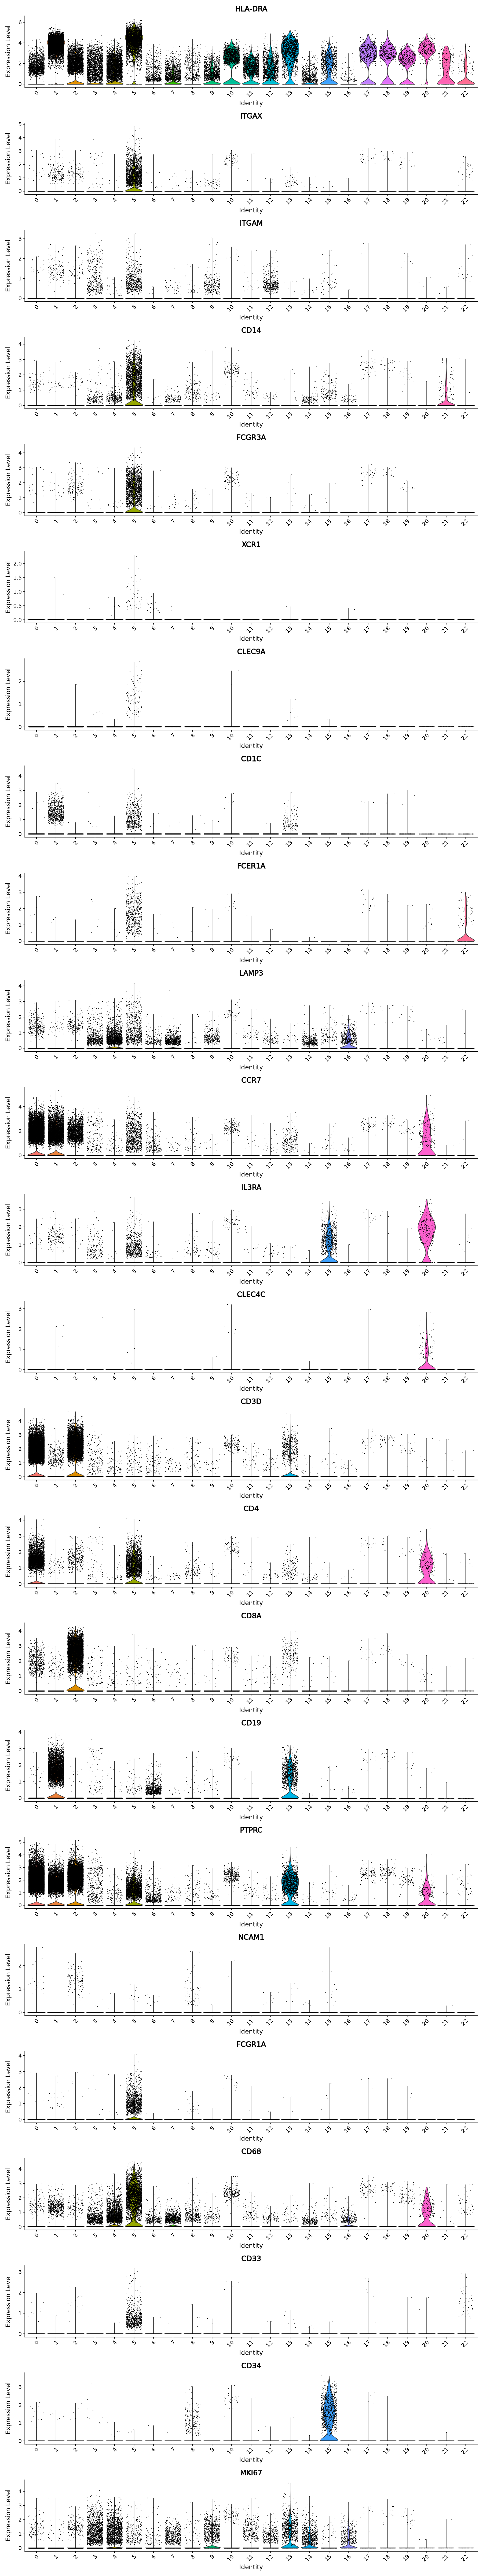

In [21]:
#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

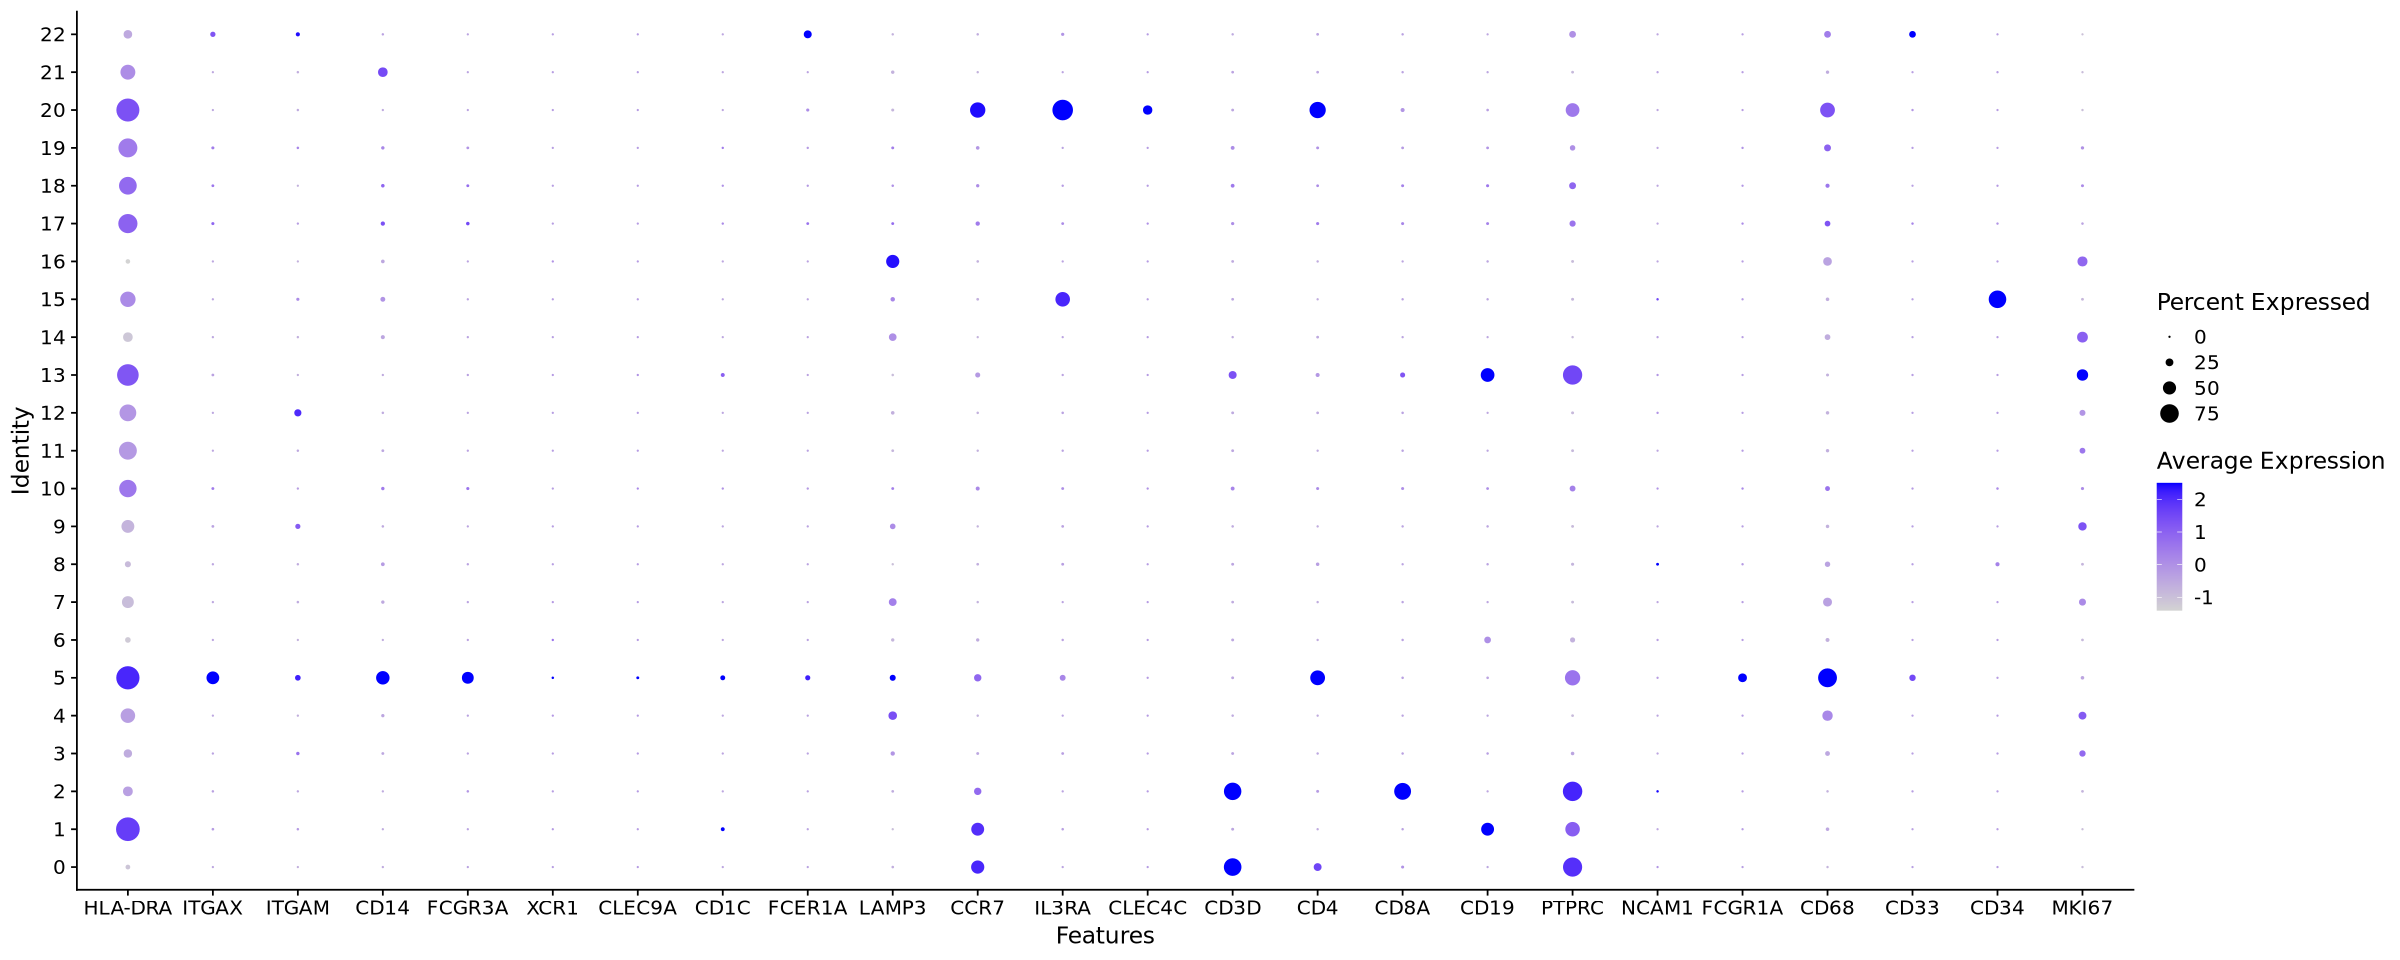

In [22]:
#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))

#### From above it looks like cluster 5 contains myeloid cells, subsetting out cluster 5


In [23]:
head(HNSCC@meta.data)

orig.ident nCount_RNA nFeature_RNA sample_type
GSE173468_N3_AAACCTGAGAGCCTAG-1 GSE173468  2128        817         Healthy    
GSE173468_N3_AAACCTGCAAGAAGAG-1 GSE173468  2158        682         Healthy    
GSE173468_N3_AAACCTGGTCTCCATC-1 GSE173468  4827       1330         Healthy    
GSE173468_N3_AAACCTGTCTATGTGG-1 GSE173468  3380       1435         Healthy    
GSE173468_N3_AAACGGGAGGGTTTCT-1 GSE173468   849        478         Healthy    
GSE173468_N3_AAACGGGCAATACGCT-1 GSE173468  6320       2465         Healthy    
                                cancer_type patient_id sample_id           
GSE173468_N3_AAACCTGAGAGCCTAG-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACCTGCAAGAAGAG-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACCTGGTCTCCATC-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACCTGTCTATGTGG-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACGGGAGGGTTTCT-1 Healthy     N3         GSE173468_Healthy_N3
GSE173468_N3_AAACGGGCAATACGCT-1 Healthy     N3         GSE173468_Healthy_N3
                                percent.mt RNA_snn_res.0.2 seurat_clusters
GSE173468_N3_AAACCTGAGAGCCTAG-1 2.6315789  0               0              
GSE173468_N3_AAACCTGCAAGAAGAG-1 0.5097312  0               0              
GSE173468_N3_AAACCTGGTCTCCATC-1 4.3712451  1               1              
GSE173468_N3_AAACCTGTCTATGTGG-1 0.7692308  0               0              
GSE173468_N3_AAACGGGAGGGTTTCT-1 2.7090695  0               0              
GSE173468_N3_AAACGGGCAATACGCT-1 1.1234177  8               8

In [24]:
myeloid_HNSCC <- subset(HNSCC, subset = RNA_snn_res.0.2 %in% c("5"))

In [25]:
myeloid_HNSCC

An object of class Seurat 
36601 features across 4434 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 37 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, scale.data
 2 dimensional reductions calculated: pca, umap

In [26]:
saveRDS(myeloid_HNSCC, "/scratch/user/s4436039/scdata/GSE173468/GSE173468_myeloid.RDS")

Following the above then need to move entire GSE173468 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE173468/ /QRISdata/Q5935/nikita/scdata/GSE173468
```